# Multiple Linear Regression

#### y ~ x1, x2, x3, ... , xn


y_pred = B0 + B1.x1 + B2.x2 + B3.x3 + ... + Bn.xn

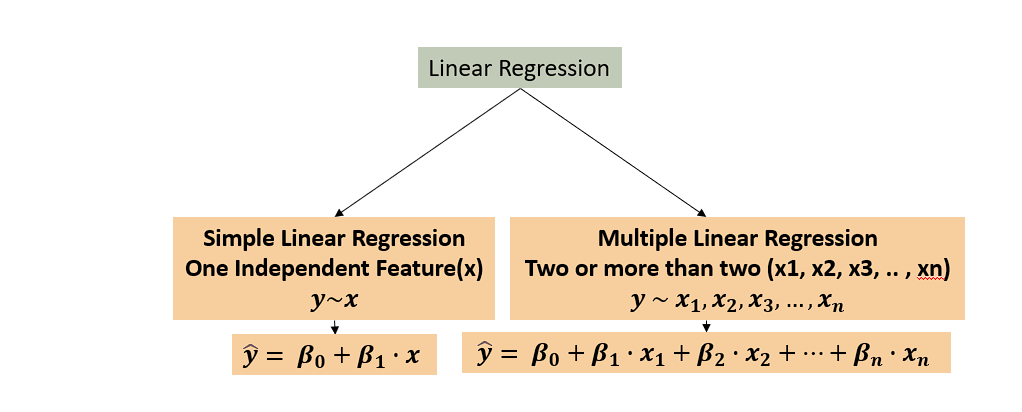

In [2]:
from warnings import filterwarnings
filterwarnings('ignore')

#Step 1 : Read the dataset

In [3]:
import pandas as pd 
df = pd.read_csv('50_Startups.csv')
df.head()

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


Step 2 : Seperate X and Y(PROFIT)

In [4]:
X = df[['RND', 'ADMIN', 'MKT']]
Y = df[['PROFIT']]

In [5]:
X.head()

,RND,ADMIN,MKT
0,165349.20,136897.80,471784.10
1,162597.70,151377.59,443898.53
2,153441.51,101145.55,407934.54
3,144372.41,118671.85,383199.62
4,142107.34,91391.77,366168.42


In [6]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


Step 3 : Model Building

In [7]:
from sklearn.linear_model  import LinearRegression
model=LinearRegression()
model.fit(X,Y)

LinearRegression()

In [8]:
model.intercept_

array([50122.19298987])

In [9]:
model.coef_

array([[ 0.80571505, -0.02681597,  0.02722806]])

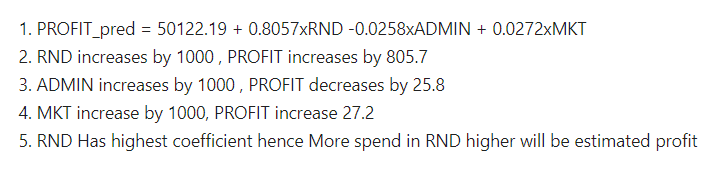

Step 4 : Evaluate the model

In [10]:
#get r2 score
model.score(X,Y)

0.9507459940683246

In [11]:
ypred=model.predict(X)
ypred[0:5]

array([[192521.25289008],
       [189156.76823227],
       [182147.2790962 ],
       [173696.70002553],
       [172139.51418327]])

In [12]:
from sklearn.metrics import mean_squared_error
mse = mean_squared_error(Y, ypred)
mse

78417126.01913083

In [15]:
rmse = mse**(1/2)
rmse

8855.34448901514

In [16]:
from sklearn.metrics import mean_absolute_error
mae=mean_absolute_error(Y,ypred)
mae

6471.4503961048085

In [17]:
from sklearn.metrics import mean_absolute_percentage_error
mape = mean_absolute_percentage_error(Y, ypred)
mape

0.10601209160494125

In [18]:
from sklearn.metrics import r2_score
r2 = r2_score(Y, ypred)
r2

0.9507459940683246

As r2 > 0.8 above is a good model

Step 5 : Out of sample predictions

In [19]:
xnew1 = [[100000, 60000, 70000]]
model.predict(xnew1)

array([[130990.70441381]])

In [20]:
xnew2 = [[130000, 30000, 70000]]
model.predict(xnew2)

array([[155966.63496313]])

Regplot for each columns

In [21]:
import matplotlib.pyplot as plt 
import seaborn as sns

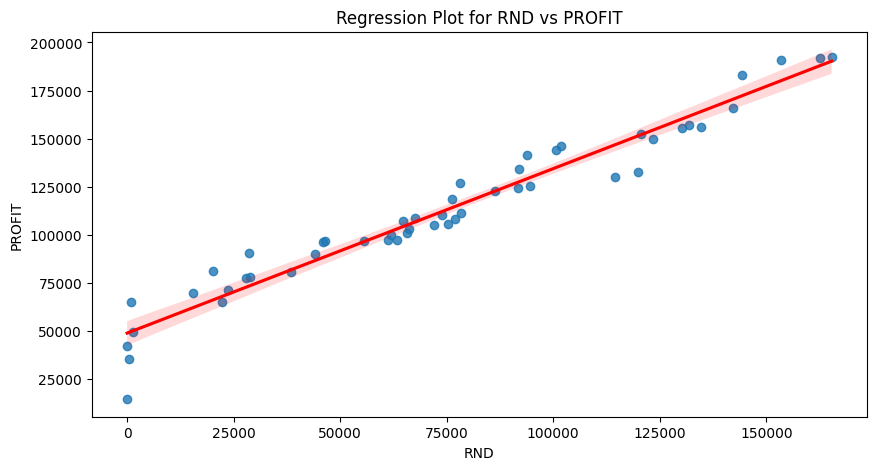

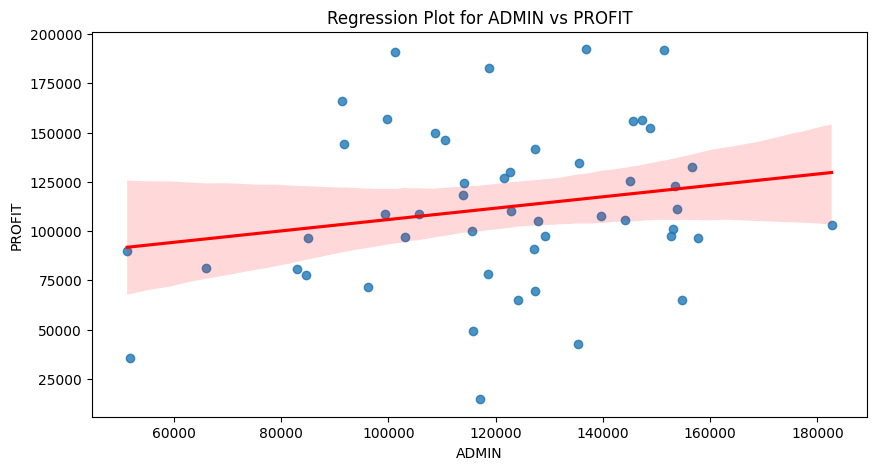

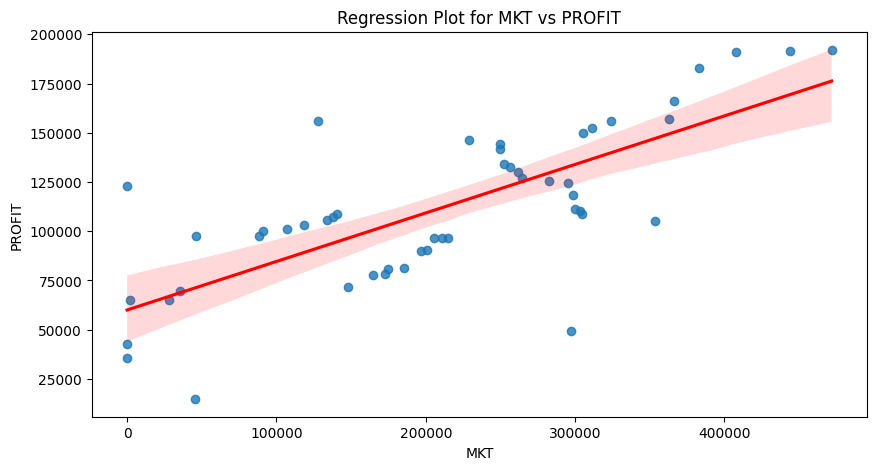

In [22]:
for i in ['RND', 'ADMIN', 'MKT']:
    plt.figure(figsize=(10,5))
    sns.regplot(data=df, x=i, y='PROFIT', line_kws={'color':'red'})
    plt.title(f'Regression Plot for {i} vs PROFIT')
    plt.show()